# Data Cleaning

Estimated time needed: **45** minutes

Most of the real-world data, that the data scientist work with, are raw data, meaning that it can contain repeated, missing, and irrelevant entries of information. Hence, if this data is used in any machine learning analysis, it will result in low accuracy or incorrect prediction. For this reason, data cleaning, also known as data cleansing, is an important technique that comes prior to any model building. 

In this notebook, we will take a look at some of the common data cleaning techniques that data scientists may use to prepare their data for analysis.

## Objectives

After completing this lab you will be able to:

*   Use Log function to transform the data
*   Handle the duplicates
*   Handle the missing values
*   Standardize and normalize the data
*   Handle the outliers



***


## **Setup**


For this lab, we will be using the following libraries:
 - [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) for managing the data.
 - [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) for mathematical operations.
 - [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) for visualizing the data.
 - [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) for visualizing the data.
 - [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) for machine learning and machine-learning-pipeline related functions.
 - [`scipy`](https://docs.scipy.org/doc/scipy/tutorial/stats.html/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) for statistical computations.


## **Import the required libraries**


The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [115]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [116]:
import warnings
warnings.filterwarnings('ignore')

In [117]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import norm
from scipy import stats

## **Reading and understanding our data**


For this lab, we will be using the Ames_housing_df_Data.tsv file, hosted on IBM Cloud object storage. The Ames housing_df dataset examines features of houses sold in Ames (a small city in the state of Iowa in the United States) during the 2006–2010 timeframe.


Let's read the data into *pandas* data frame and look at the first 5 rows using the `head()` method.


In [118]:
# Load the dataset
housing_df = pd.read_csv('Ames_Housing_Data1.tsv', sep='\t')

# Display the first few rows
housing_df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000


In [119]:
# Get dataset information
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2931 non-null   int64  
 1   PID              2931 non-null   int64  
 2   MS SubClass      2931 non-null   int64  
 3   MS Zoning        2931 non-null   object 
 4   Lot Frontage     2441 non-null   float64
 5   Lot Area         2931 non-null   int64  
 6   Street           2931 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2931 non-null   object 
 9   Land Contour     2931 non-null   object 
 10  Utilities        2931 non-null   object 
 11  Lot Config       2931 non-null   object 
 12  Land Slope       2931 non-null   object 
 13  Neighborhood     2931 non-null   object 
 14  Condition 1      2931 non-null   object 
 15  Condition 2      2931 non-null   object 
 16  Bldg Type        2931 non-null   object 
 17  House Style   

We can find more information about the features and types using the `info()`  method.


According to the output above, we have 2930 entries, 0 to 2929, as well as 81 features. The "Non-Null Count" column shows the number of non-null entries.  If the count is 2930 then there is no missing values for that particular feature. 'SalePrice' is our target or response variable and the rest of the features are our predictor variables.

We also have a mix of numerical (28 int64 and 11 float64) and object data types. 


Next, let's use the `describe()` function to show the count, mean, min, max of the sale price attribute.


In [120]:
# Statistical summary
print(housing_df.describe())

             Order           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2931.000000  2.931000e+03  2931.000000   2441.000000    2931.000000   
mean   1465.000341  7.144003e+08    57.374616     69.253994   10155.298874   
std     846.250554  1.887306e+08    42.636341     23.405675    7888.789128   
min       1.000000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     732.500000  5.284770e+08    20.000000     58.000000    7440.500000   
50%    1465.000000  5.354532e+08    50.000000     68.000000    9439.000000   
75%    2197.500000  9.071811e+08    70.000000     80.000000   11556.000000   
max    2930.000000  1.007100e+09   190.000000    313.000000  215245.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2931.000000   2931.000000  2931.000000     2931.000000   2908.000000   
mean       6.094848      5.562948  1971.352439     1984.258274    101.900275   
std        1.410786      1.111396    30.240926       20.8

In [121]:
housing_df["SalePrice"].describe()

count      2931.000000
mean     180807.729785
std       79875.557267
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

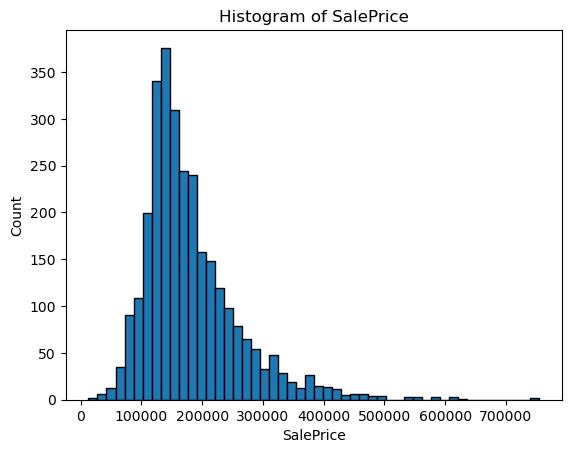

In [122]:
# Histogram for SalePrice
plt.hist(housing_df['SalePrice'], bins=50, edgecolor='black')
plt.title('Histogram of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Count')
plt.show()

From the above analysis, it is important to note that the minimum value is greater than 0. Also, there is a big difference between the minimum value and the 25th percentile. It is bigger than the 75th percentile and the maximum value. This means that our data might not be normally distributed (an important assumption for linear regression analysis), so will check for normality in the Log Transform section. 


## Hands-On Example 1: Initial Exploration of the Dataset


The `describe()` function reveals the statistical information about the numeric attributes. To reveal some information about our categorical (object) attributes, we can use `value_counts()` function. In this exercise, describe all categories of the 'Sale Condition' attribute.


In [123]:
# Enter your code and run the cell
housing_df["Sale Condition"].value_counts()

Sale Condition
Normal     2414
Partial     245
Abnorml     190
Family       46
Alloca       24
AdjLand      12
Name: count, dtype: int64

## **Looking for Correlations**


Before proceeding with the data cleaning, it is useful to establish a correlation between the response variable (in our case the sale price) and other predictor variables, as some of them might not have any major impact in determining the price of the house and will not be used in the analysis.  There are many ways to discover correlation between the target variable and the rest of the features. Building pair plots, scatter plots, heat maps, and a correlation matrixes are the most common ones. Below, we will use the `corr()` function to list the top features based on the [pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) (measures how closely two sequences of numbers are correlated). Correlation coefficient can only be calculated on the numerical attributes (floats and integers), therefore, only the numeric attributes will be selected.


In [124]:
# Compute the correlation matrix
correlation_matrix = housing_df.corr(numeric_only=True)

# Display the top correlations with SalePrice
correlation_matrix['SalePrice'].sort_values(ascending=False)

SalePrice          1.000000
Overall Qual       0.799226
Gr Liv Area        0.706791
Garage Cars        0.647891
Garage Area        0.640411
Total Bsmt SF      0.632270
1st Flr SF         0.621672
Year Built         0.558340
Full Bath          0.545339
Year Remod/Add     0.532664
Garage Yr Blt      0.526808
Mas Vnr Area       0.508277
TotRms AbvGrd      0.495500
Fireplaces         0.474481
BsmtFin SF 1       0.432950
Lot Frontage       0.357141
Wood Deck SF       0.327220
Open Porch SF      0.312970
Half Bath          0.284909
Bsmt Full Bath     0.276144
2nd Flr SF         0.269222
Lot Area           0.266600
Bsmt Unf SF        0.182808
Bedroom AbvGr      0.143934
Screen Porch       0.112104
Pool Area          0.068392
Mo Sold            0.035191
3Ssn Porch         0.032209
BsmtFin SF 2       0.005848
Misc Val          -0.015704
Yr Sold           -0.030308
Order             -0.031644
Bsmt Half Bath    -0.035870
Low Qual Fin SF   -0.037673
MS SubClass       -0.085206
Overall Cond      -0

Above, there are 11 features, with coefficients greater than 0.5, that are strongly correlated with the sale price. 


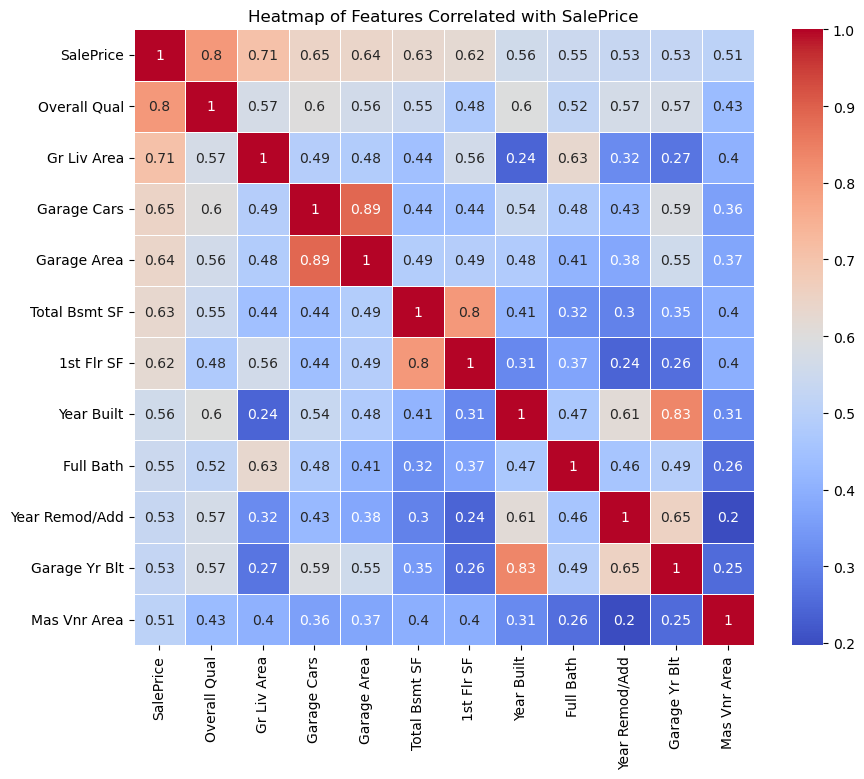

In [125]:
# Select features with correlation >= 0.5 with SalePrice
strong_corr_features = [
    'SalePrice', 'Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area',
    'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Full Bath',
    'Year Remod/Add', 'Garage Yr Blt', 'Mas Vnr Area'
]
strong_corr_matrix = correlation_matrix.loc[strong_corr_features, strong_corr_features]

# Visualize the heatmap for features with correlation >= 0.5
plt.figure(figsize=(10, 8))
sns.heatmap(strong_corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Features Correlated with SalePrice')
plt.show()

Next, let's generate some par plots to visually inspect the correlation between some of these features and the target variable. We will use seaborns `sns.pairplot()` function for this analysis. Also, building pair plots is one of the possible ways to spot the outliers that might be present in the data.


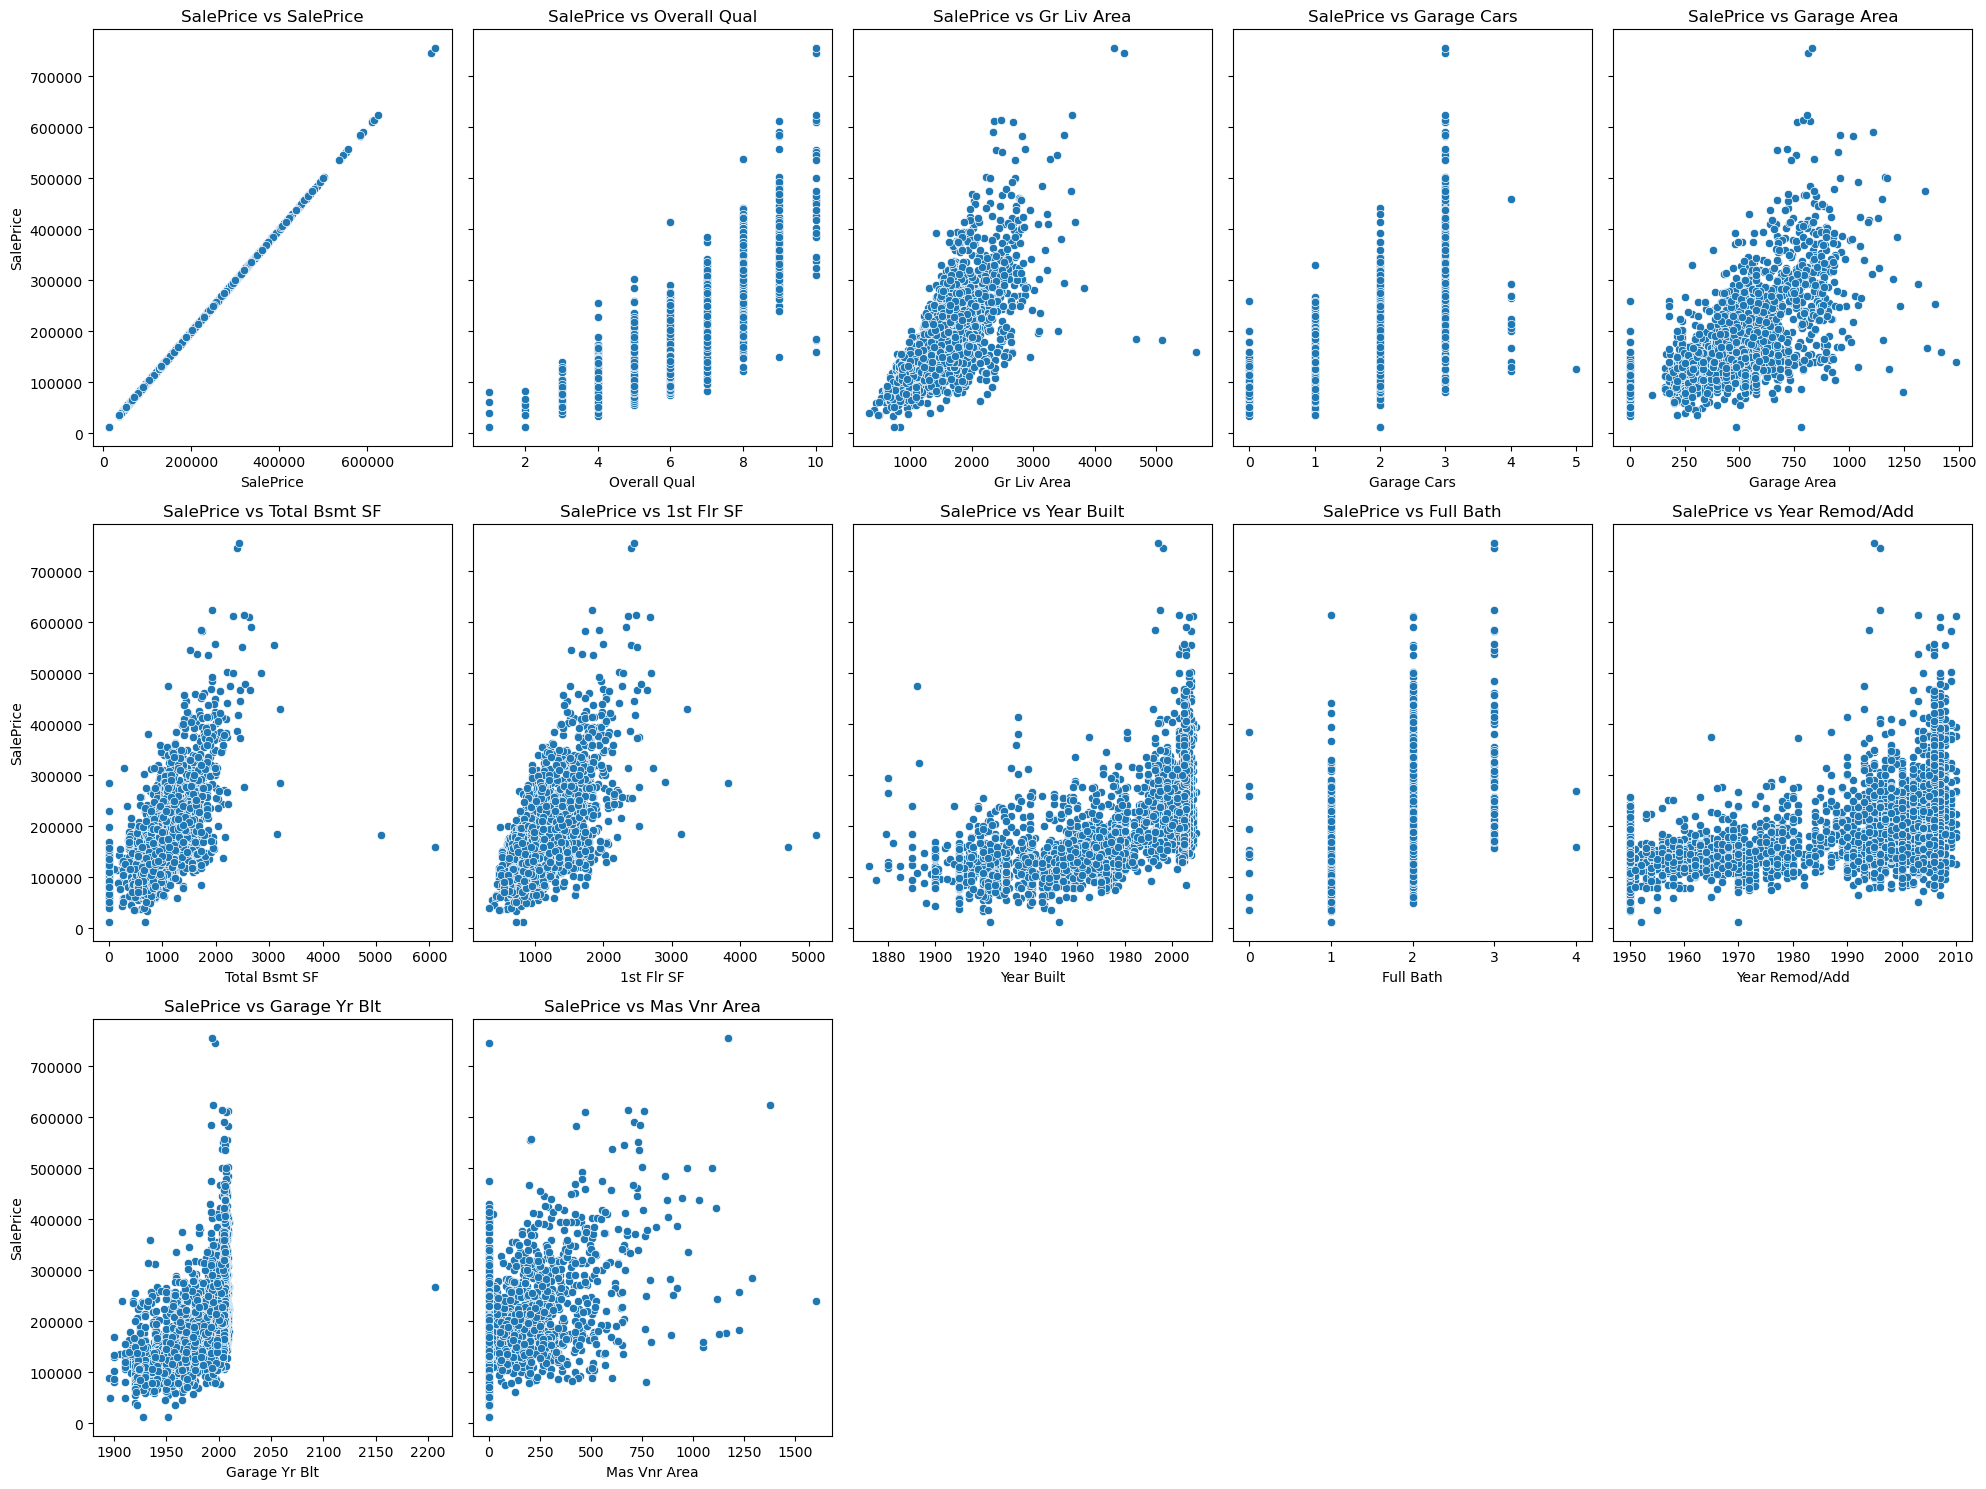

In [126]:
# Define number of columns per line
cols_per_line = 5
n_rows = (len(strong_corr_features) + cols_per_line - 1) // cols_per_line  # Calculate rows using integer division

# Create subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=cols_per_line, figsize=(20, 5 * n_rows), sharey=True)

# Flatten axes array for easy indexing
axes = axes.flatten()

# Plot scatter plots
for i, feature in enumerate(strong_corr_features):
    sns.scatterplot(ax=axes[i], x=housing_df[feature], y=housing_df['SalePrice'])
    axes[i].set_title(f'SalePrice vs {feature}')
    axes[i].set_xlabel(feature)
    if i % cols_per_line == 0:  # Add ylabel only for the first column in each row
        axes[i].set_ylabel('SalePrice')
    else:
        axes[i].set_ylabel("")

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

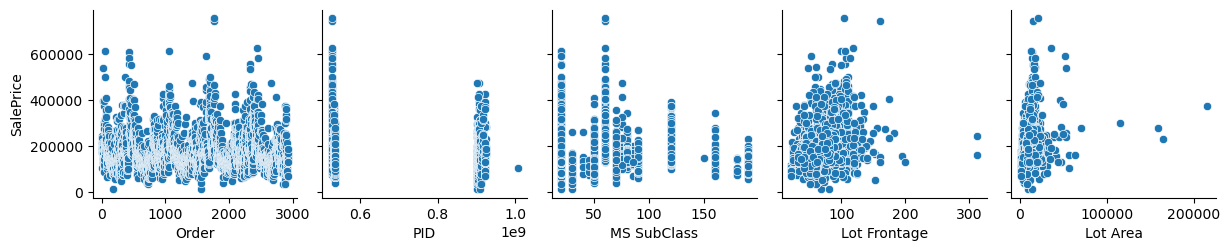

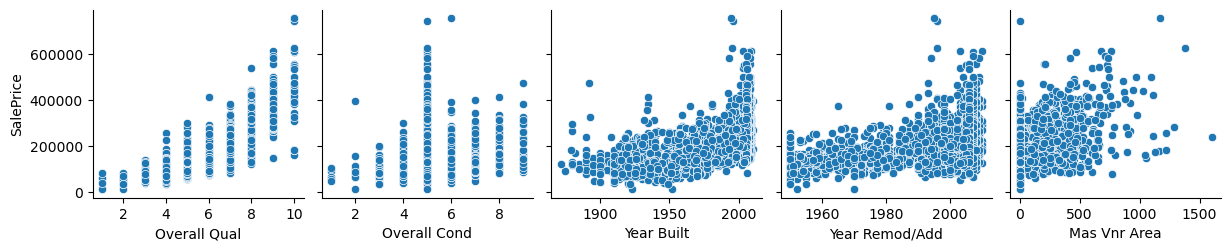

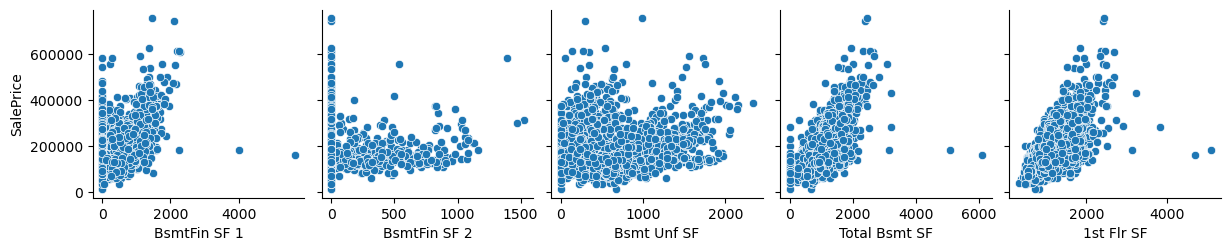

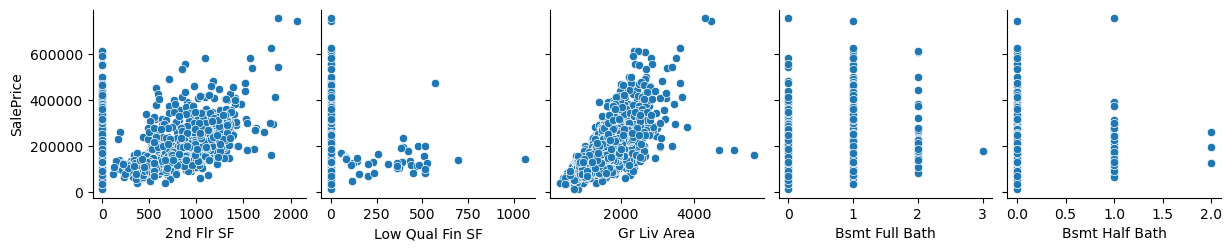

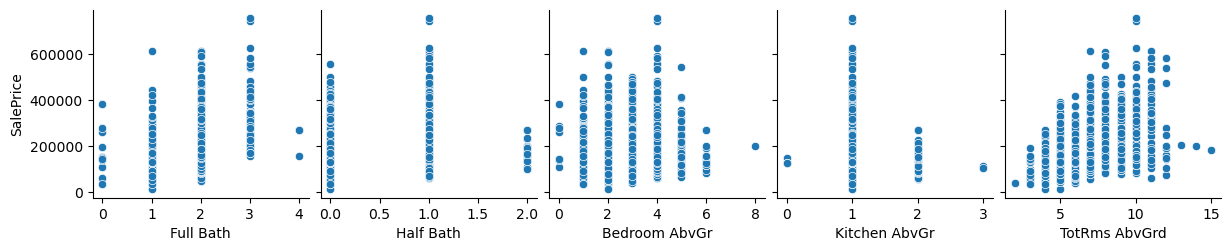

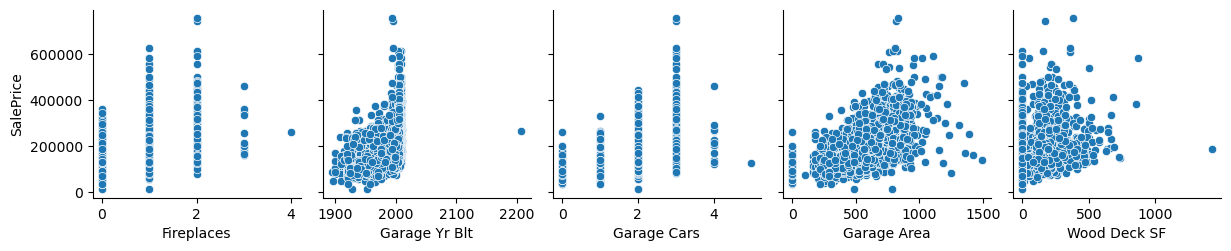

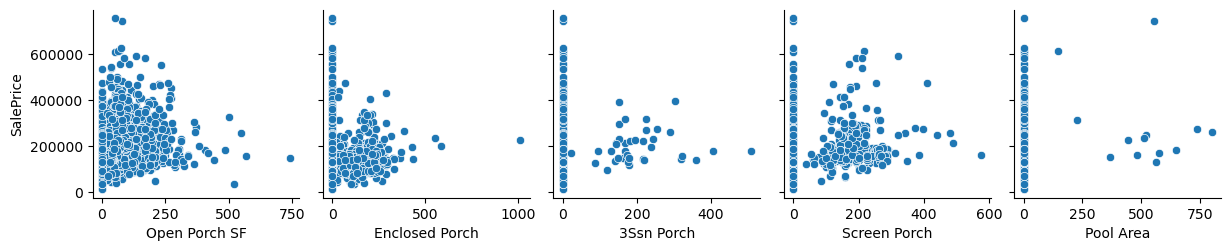

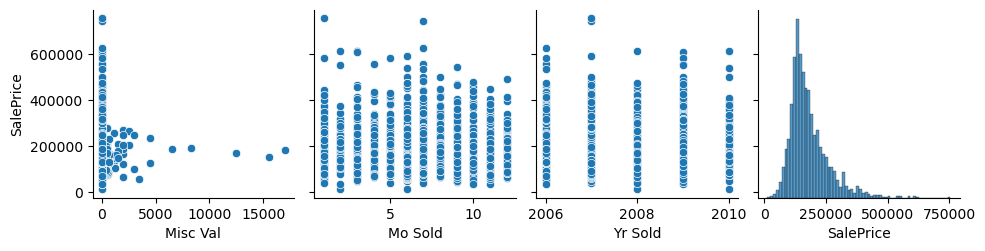

In [127]:
for i in range(0, len(hous_num.columns), 5):
    sns.pairplot(data=hous_num,
                x_vars=hous_num.columns[i:i+5],
                y_vars=['SalePrice'])

From Pearsons Correlation Coefficients and pair plots, we can draw some conclusions about the features that are most strongly correlated to the 'SalePrice'. They are: 'Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area', and others.


## **Log Transformation**


In this section, we are going to inspect whether our 'SalePrice' data are normally distributed. The assumption of the normal distribution must be met in order to perform any type of regression analysis. There are several ways to check for this assumption, however here, we will use the visual method, by plotting the 'SalePrice' distribution using the `distplot()` function from the `seaborn` library.


As the plot shows, our 'SalePrice' deviates from the normal distribution. It has a longer tail to the right, so we call it a positive skew. In statistics *skewness* is a measure of asymmetry of the distribution. In addition to skewness, there is also a kurtosis, parameter which refers to the pointedness of a peak in the distribution curve. Both skewness and kurtosis are frequently used together to characterize the distribution of data.


Here, we can simply use the `skew()` function to calculate our skewness level of the `SalePrice`.


In [128]:
# Calculate skewness before transformation
before_skewness = housing_df['SalePrice'].skew()
print(f"Skewness of SalePrice before log transformation: {before_skewness}")

Skewness of SalePrice before log transformation: 1.743221853159165


The range of skewness for a fairly symmetrical bell curve distribution is between -0.5 and 0.5; moderate skewness is -0.5 to -1.0 and 0.5 to 1.0; and highly skewed distribution is < -1.0 and > 1.0. In our case, we have ~1.7, so it is considered  highly skewed data. 

Now, we can try to transform our data, so it looks more normally distributed. We can use the `np.log()` function from the `numpy` library to perform log transform. This [documentation](https://numpy.org/doc/stable/reference/generated/numpy.log.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) contains more information about the numpy log transform.


In [129]:
# Apply log transformation to SalePrice
housing_df['LogSalePrice'] = np.log1p(housing_df['SalePrice'])

In [130]:
# Calculate skewness after transformation
after_skewness = housing_df['LogSalePrice'].skew()
print(f"Skewness of SalePrice after log transformation: {after_skewness}")

Skewness of SalePrice after log transformation: -0.015333049018241882


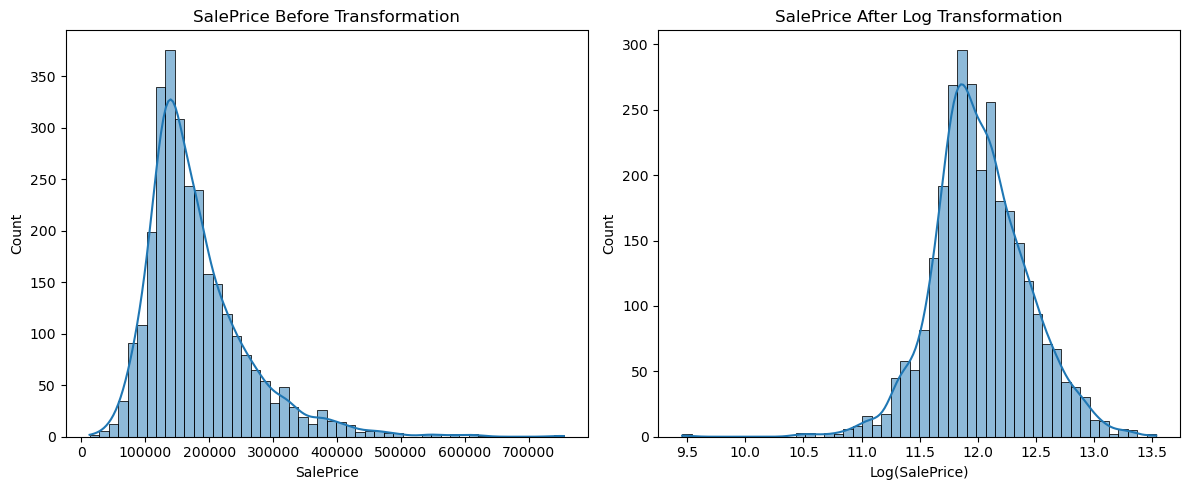

In [131]:
# Plot histogram before transformation
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(housing_df['SalePrice'], bins=50, kde=True, edgecolor='black')
plt.title('SalePrice Before Transformation')
plt.xlabel('SalePrice')
plt.ylabel('Count')

# Plot histogram after transformation
plt.subplot(1, 2, 2)
sns.histplot(housing_df['LogSalePrice'], bins=50, kde=True, edgecolor='black')
plt.title('SalePrice After Log Transformation')
plt.xlabel('Log(SalePrice)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [132]:
print("Skewness: %f" % (log_transformed).skew())

Skewness: -0.015354


As we can see, the log method transformed the 'SalePrice' distribution into a more symmetrical bell curve and the skewness level now is -0.01, well within the range. 

There are other ways to correct for skewness of the data. For example, Square Root Transform (`np.sqrt`) and the Box-Cox Transform (`stats.boxcox` from the `scipy stats` library). To learn more about these two methods, please check out this [article](https://towardsdatascience.com/top-3-methods-for-handling-skewed-data-1334e0debf45?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01).


## Exercise 2


In this exercise, visually inspect the 'Lot Area' feature. If there is any skewness present, apply log transform to make it more normally distributed.

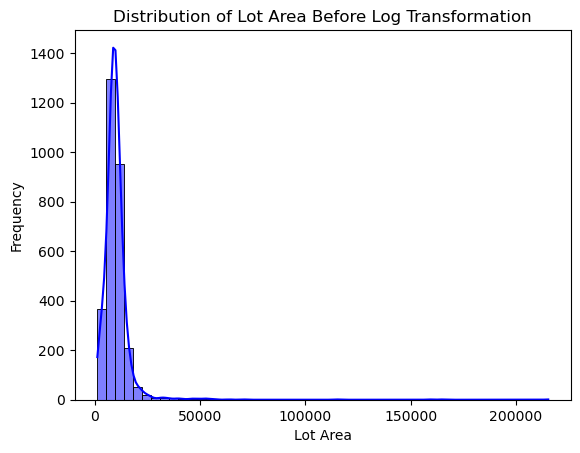

Skewness (Before Log Transformation): 12.778041


In [133]:
# Visualize the original distribution of Lot Area
la_plot = sns.histplot(housing_df['Lot Area'], kde=True, bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Lot Area Before Log Transformation')
plt.xlabel('Lot Area')
plt.ylabel('Frequency')
plt.show()

# Calculate and print skewness
print("Skewness (Before Log Transformation): %f" % housing_df['Lot Area'].skew())

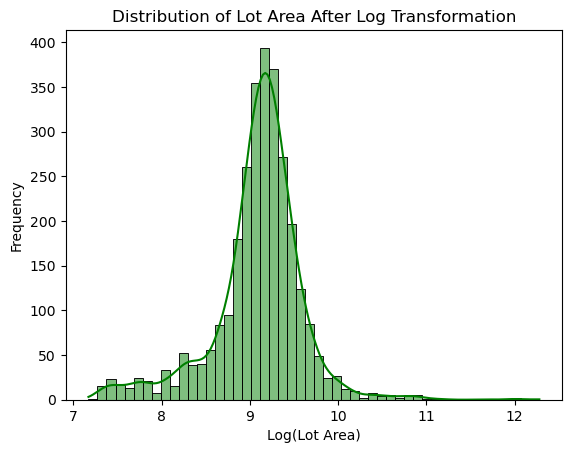

Skewness (After Log Transformation): -0.494639


In [134]:
# Apply log transformation
la_log = np.log(housing_df['Lot Area'])

# Visualize the transformed distribution
sns.histplot(la_log, kde=True, bins=50, color='green', edgecolor='black')
plt.title('Distribution of Lot Area After Log Transformation')
plt.xlabel('Log(Lot Area)')
plt.ylabel('Frequency')
plt.show()

# Calculate and print skewness after log transformation
print("Skewness (After Log Transformation): %f" % la_log.skew())

Skewness: 12.778041
Skewness: -0.494639


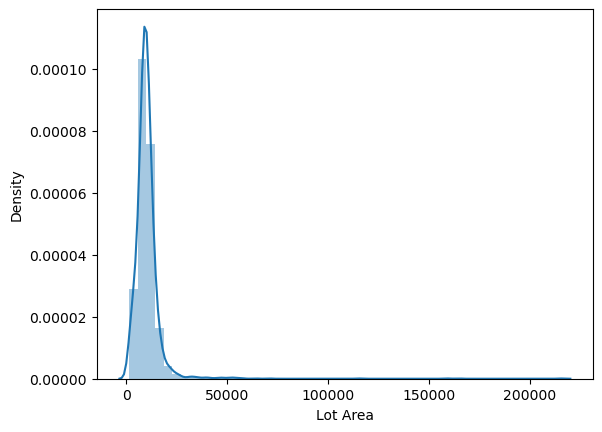

In [135]:
# Enter your code and run the cell
la_plot = sns.distplot(housing_df['Lot Area'])
print("Skewness: %f" % housing_df['Lot Area'].skew())
la_log = np.log(housing_df['Lot Area'])
print("Skewness: %f" % la_log.skew())

## **Handling the Duplicates**


## Hands-On Example 3: Practical Application of Deduplication Techniques

As mentioned in the video, having duplicate values can effect our analysis, so it is good to check whether there are any duplicates in our data. We will use pandas `duplicated()` function and search by the 'PID' column, which contains a unique index number for each entry.


In [136]:
# Identify duplicates
duplicates = housing_df[housing_df.duplicated()]
print(duplicates)

   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
1      1  526301100           20        RL         141.0     31770   Pave   

  Alley Lot Shape Land Contour  ... Pool QC Fence Misc Feature Misc Val  \
1   NaN       IR1          Lvl  ...     NaN   NaN          NaN        0   

  Mo Sold Yr Sold Sale Type Sale Condition  SalePrice  LogSalePrice  
1       5    2010       WD          Normal     215000     12.278398  

[1 rows x 83 columns]


In [137]:
duplicate = housing_df[housing_df.duplicated(['PID'])]
duplicate

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,LogSalePrice
1,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,NaN,NaN,NaN,0,5,2010,WD,Normal,215000,12.278398


As we can see, there is one duplicate row in this dataset. To remove it, we can use pandas `drop_duplicates()` function. By default, it removes all duplicate rows based on all the columns.


In [138]:
housing_df = housing_df.drop_duplicates()
print(f"Number of rows after removing duplicates: {len(housing_df)}")

Number of rows after removing duplicates: 2930


An alternative way to check if there are any duplicated Indexes in our dataset is using `index.is_unique` function.


In [139]:
# Verify no duplicates remain
print(f"Number of duplicate rows after cleaning: {housing_df.duplicated().sum()}")

Number of duplicate rows after cleaning: 0


## **Handling the Missing Values**


### Finding the Missing Values


For easier detection of missing values, pandas provides the `isna()`, `isnull()`, and `notna()` functions. For more information on pandas missing values please check out this [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01).


To summarize all the missing values in our dataset, we will use `isnull()` function. Then, we will add them all up, by using `sum()` function, sort them with `sort_values()` function, and plot the first 20 columns (as the majority of our missing values fall within first 20 columns), using the `bar plot` function from the `matplotlib` library.


In [140]:
# Check for missing values
missing_data = housing_df.isnull().sum()
missing_percentage = (missing_data / len(housing_df)) * 100
missing_summary = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})
print(missing_summary[missing_summary['Missing Values'] > 0].sort_values(by='Percentage', ascending=False))

                Missing Values  Percentage
Pool QC                   2917   99.556314
Misc Feature              2824   96.382253
Alley                     2732   93.242321
Fence                     2358   80.477816
Mas Vnr Type              1775   60.580205
Fireplace Qu              1422   48.532423
Lot Frontage               490   16.723549
Garage Cond                159    5.426621
Garage Qual                159    5.426621
Garage Finish              159    5.426621
Garage Yr Blt              159    5.426621
Garage Type                157    5.358362
Bsmt Exposure               83    2.832765
BsmtFin Type 2              81    2.764505
Bsmt Cond                   80    2.730375
Bsmt Qual                   80    2.730375
BsmtFin Type 1              80    2.730375
Mas Vnr Area                23    0.784983
Bsmt Half Bath               2    0.068259
Bsmt Full Bath               2    0.068259
BsmtFin SF 1                 1    0.034130
Garage Cars                  1    0.034130
Garage Area

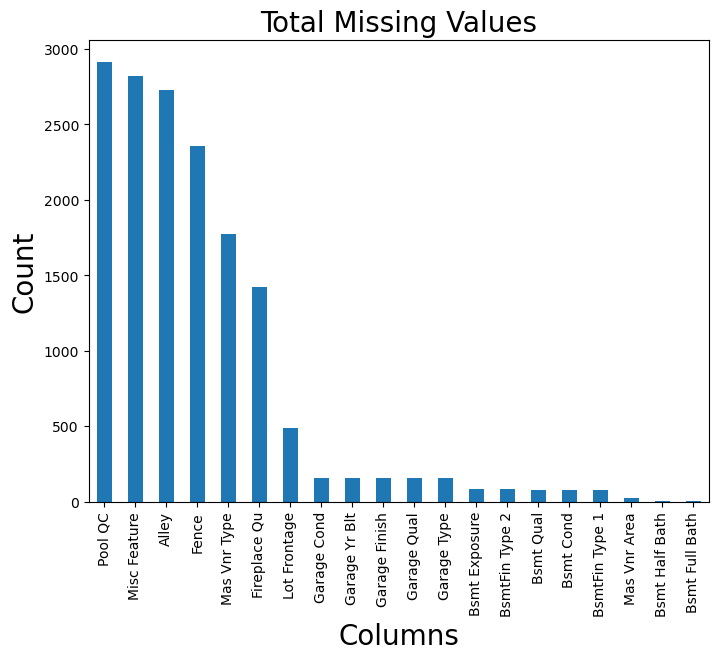

In [141]:
# Visualize missing values
total = housing_df.isnull().sum().sort_values(ascending=False)
total_select = total.head(20)
total_select.plot(kind="bar", figsize=(8, 6), fontsize=10)

plt.xlabel("Columns", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title("Total Missing Values", fontsize=20)
plt.show()

There are several options for dealing with missing values. We will use 'Lot Frontage' feature to analyze for missing values.


1. We can drop the missing values, using `dropna()` method.


In [142]:
# Calculate and impute mean for Mas Vnr Area
mean = housing_df["Mas Vnr Area"].mean()
housing_df["Mas Vnr Area"].fillna(mean, inplace=True)

# Verify imputation
print(f"Missing values in 'Mas Vnr Area': {housing_df['Mas Vnr Area'].isnull().sum()}")

Missing values in 'Mas Vnr Area': 0


2. We can replace the missing values (zero, the mean, the median, etc.), using `fillna()` method.


In [143]:
# Calculate and impute median for Lot Frontage
median = housing_df["Lot Frontage"].median()
housing_df["Lot Frontage"].fillna(median, inplace=True)

# Verify imputation
print(f"Missing values in 'Lot Frontage': {housing_df['Lot Frontage'].isnull().sum()}")

Missing values in 'Lot Frontage': 0


Using this method, all the rows, containing null values in 'Lot Frontage' feature, for example, will be dropped. 


3. We can drop the whole attribute (column), that contains missing values, using the `drop()` method.


In [144]:
housing_df.drop("Lot Frontage", axis=1)

,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,LogSalePrice
0,1,526301100,20,RL,31770,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2010,WD,Normal,215000,12.278398
2,2,526350040,20,RH,11622,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000,11.561725
3,3,526351010,20,RL,14267,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000,12.055256
4,4,526353030,20,RL,11160,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2010,WD,Normal,244000,12.404928
5,5,527105010,60,RL,13830,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900,12.154258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,2926,923275080,80,RL,7937,Pave,NaN,IR1,Lvl,AllPub,...,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500,11.867104
2927,2927,923276100,20,RL,8885,Pave,NaN,IR1,Low,AllPub,...,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000,11.782960
2928,2928,923400125,85,RL,10441,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000,11.790565
2929,2929,924100070,20,RL,10010,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2006,WD,Normal,170000,12.043560


Using this method, the entire column containing the null values will be dropped. 


Index# 2927, containing a missing value in the "Lot Frontage", now has been replaced with the median value.


## Hands-On Example 4: Imputation and Removal of Missing Values

In this exercise, let's look at 'Mas Vnr Area' feature and replace the missing values with the mean value of that column.


In [145]:
# Enter your code and run the cell
mean = housing_df["Mas Vnr Area"].mean()
housing_df["Mas Vnr Area"].fillna(mean, inplace = True)

## **Feature Scaling**


One of the most important transformations we need to apply to our data is feature scaling.  There are two common ways to get all attributes to have the same scale: min-max scaling and standardization.

Min-max scaling (or normalization) is the simplest: values are shifted and rescaled so they end up ranging from 0 to 1. This is done by subtracting the min value and dividing by the max minus min.

Standardization is different: first it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the standard deviation, so that the resulting distribution has unit variance.



Scikit-learn library provides `MinMaxScaler` for normalization and `StandardScaler` for standardization needs. For more information on `scikit-learn` [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) and [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) please visit their respective documentation websites. 


Step 1: Standard Scaling (Z-Score Normalization)

In [146]:
# Standardize specific features
scaler = StandardScaler()
scaled_features = ['Lot Area', 'Gr Liv Area', 'Total Bsmt SF']
housing_df[scaled_features] = scaler.fit_transform(housing_df[scaled_features])

# Display the scaled features
print(housing_df[scaled_features].head())

   Lot Area  Gr Liv Area  Total Bsmt SF
0  2.744381     0.309265       0.064433
2  0.187097    -1.194427      -0.385015
3  0.522814    -0.337718       0.629649
4  0.128458     1.207523       2.402474
5  0.467348     0.255844      -0.280598


Step 2: Min-Max Scaling

In [147]:
# Apply Min-Max scaling to specific features
minmax_scaler = MinMaxScaler()
scaled_features_minmax = ['1st Flr SF', 'Garage Area']
housing_df[scaled_features_minmax] = minmax_scaler.fit_transform(housing_df[scaled_features_minmax])

# Display the scaled features
print(housing_df[scaled_features_minmax].head())

   1st Flr SF  Garage Area
0    0.277673     0.354839
2    0.118042     0.490591
3    0.208990     0.209677
4    0.373031     0.350806
5    0.124764     0.323925


## **Handling the Outliers**


### Finding the Outliers


In statistics, an outlier is an observation point that is distant from other observations. An outlier can be due to some mistakes in data collection or recording, or due to natural high variability of data points. How to treat an outlier highly depends on our data or the type of analysis to be performed. Outliers can markedly affect our models and can be a valuable source of information, providing us insights about specific behaviours.

There are many ways to discover outliers in our data. We can do Uni-variate analysis (using one variable analysis) or Multi-variate analysis (using two or more variables). One of the simplest ways to detect an outlier is to inspect the data visually, by making box plots or scatter plots. 


### Uni-variate Analysis


A box plot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles. Outliers may be plotted as individual points. To learn more about box plots please click [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01).


Here, we will use a box plot for the 'Lot Area' and the 'SalePrice' features. 


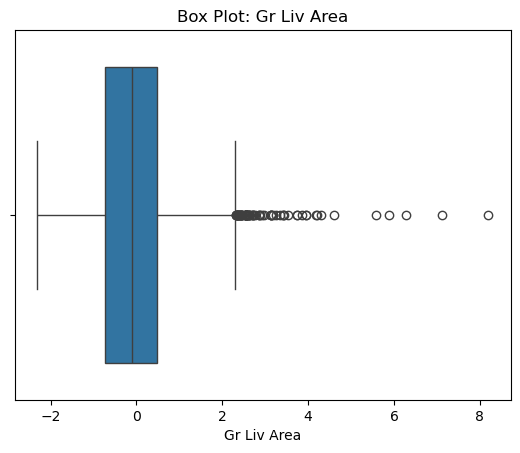

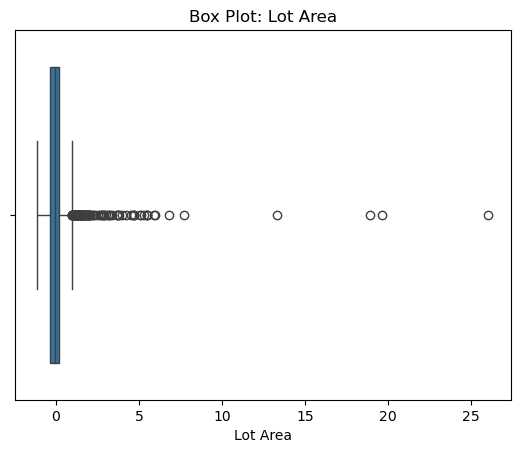

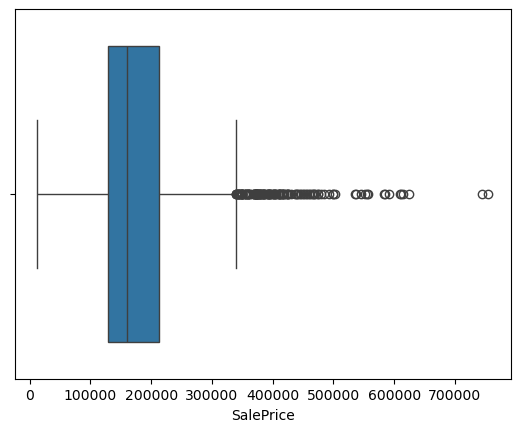

In [148]:
# Box plot for Gr Liv Area
sns.boxplot(x=housing_df['Gr Liv Area'])
plt.title('Box Plot: Gr Liv Area')
plt.show()

# Box plot for Lot Area
sns.boxplot(x=housing_df['Lot Area'])
plt.title('Box Plot: Lot Area')
plt.show()

# Box plot for SalePrice
sns.boxplot(x=housing_df['SalePrice'])
plt.show()

As we can see from these two plots, we have some points that are plotted outside the box plot area and that greatly deviate from the rest of the population. Whether to remove or keep them will greatly depend on the understanding of our data and the type of analysis to be performed. In this case, the points that are outside of our box plots in the 'Lot Area' and the 'Sale Price' might be the actual true data points and do not need to be removed.


### Bi-variate Analysis


Next, we will look at the bi-variate analysis of the two features, the sale price, 'SalePrice', and the ground living area, 'GrLivArea', and plot the scatter plot of the relationship between these two parameters. 


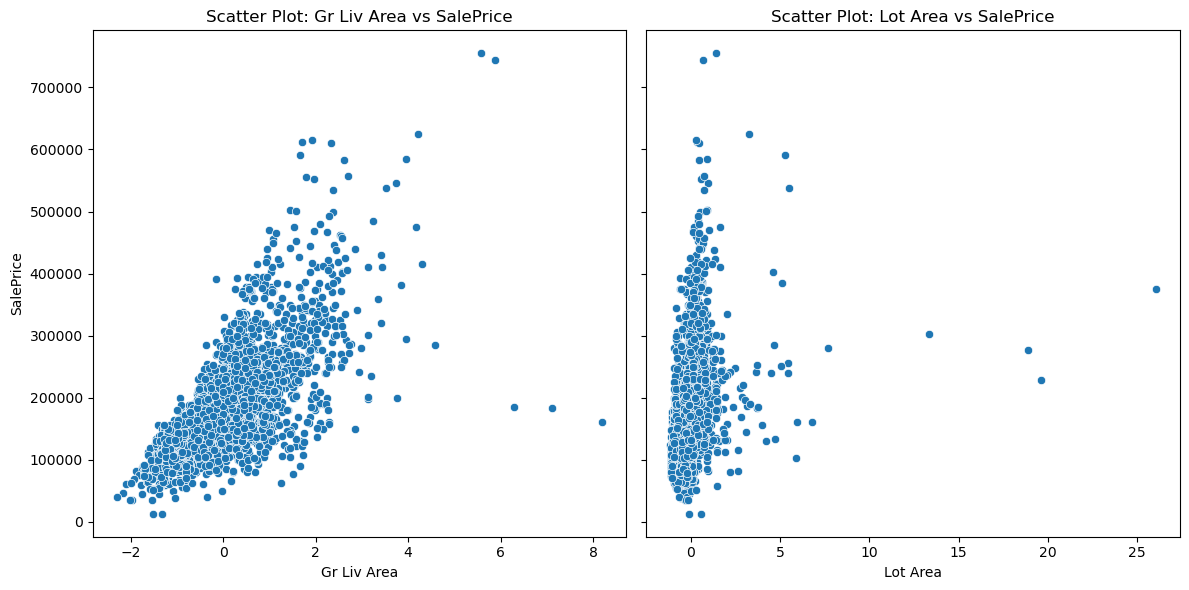

In [149]:
# Create a figure with 2 subplots side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)

# Scatter plot for Gr Liv Area vs SalePrice
sns.scatterplot(ax=axes[0], x=housing_df['Gr Liv Area'], y=housing_df['SalePrice'])
axes[0].set_title('Scatter Plot: Gr Liv Area vs SalePrice')
axes[0].set_xlabel('Gr Liv Area')
axes[0].set_ylabel('SalePrice')

# Scatter plot for Lot Area vs SalePrice
sns.scatterplot(ax=axes[1], x=housing_df['Lot Area'], y=housing_df['SalePrice'])
axes[1].set_title('Scatter Plot: Lot Area vs SalePrice')
axes[1].set_xlabel('Lot Area')
axes[1].set_ylabel('')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

### Deleting the Outliers


First, we will sort all of our 'Gr Liv Area' values and select only the last two.


In [150]:
# IQR method to remove outliers in Gr Liv Area
Q1 = housing_df['Gr Liv Area'].quantile(0.25)
Q3 = housing_df['Gr Liv Area'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
housing_df = housing_df[(housing_df['Gr Liv Area'] >= lower_bound) & (housing_df['Gr Liv Area'] <= upper_bound)]

# IQR method to remove outliers in Lot Area
Q1 = housing_df['Lot Area'].quantile(0.25)
Q3 = housing_df['Lot Area'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
housing_df = housing_df[(housing_df['Lot Area'] >= lower_bound) & (housing_df['Lot Area'] <= upper_bound)]

# Verify dataset size after removal
print(f"Dataset size after removing outliers: {len(housing_df)}")

Dataset size after removing outliers: 2731


## Hands-On Example 6 - Verify Outlier Removal

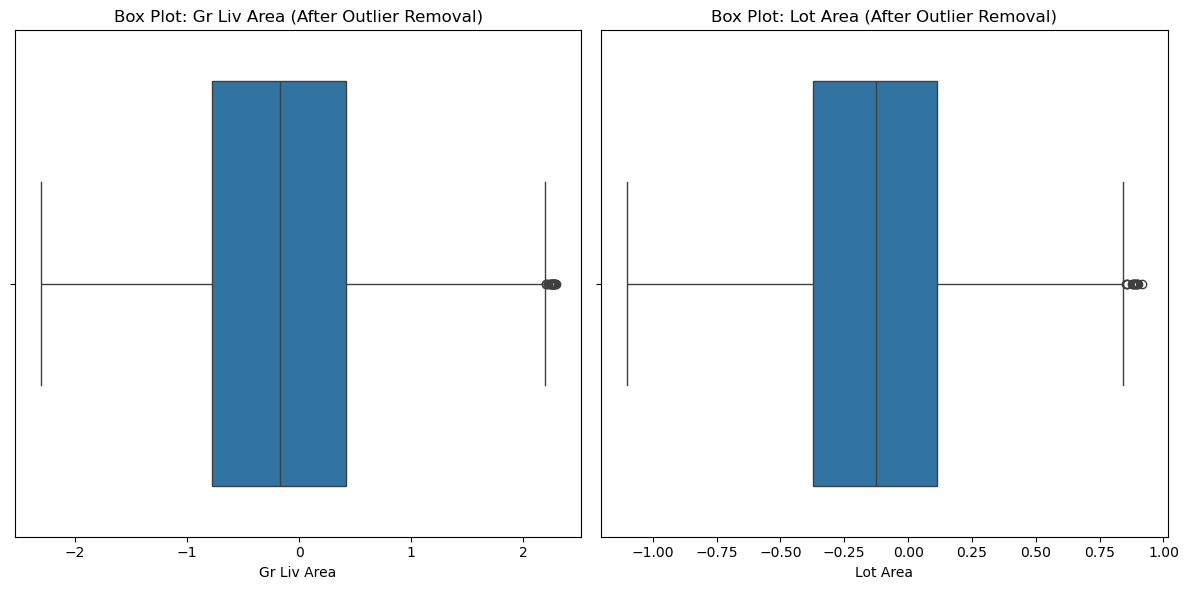

In [151]:
# Create a figure with 2 subplots side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Box plot for Gr Liv Area after outlier removal
sns.boxplot(ax=axes[0], x=housing_df['Gr Liv Area'])
axes[0].set_title('Box Plot: Gr Liv Area (After Outlier Removal)')
axes[0].set_xlabel('Gr Liv Area')

# Box plot for Lot Area after outlier removal
sns.boxplot(ax=axes[1], x=housing_df['Lot Area'])
axes[1].set_title('Box Plot: Lot Area (After Outlier Removal)')
axes[1].set_xlabel('Lot Area')

# Adjust layout
plt.tight_layout()
plt.show()

## Z-score Analysis: Verification of Outlier Handling

Z-score is another way to identify outliers mathematically. Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. In another words, Z-score is the value that quantifies relationship between a data point and a standard deviation and mean values of a group of points. Data points which are too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used. For example, if the Z-score value is greater than or less than 3 or -3 standard deviations respectively, that data point will be identified as a outlier.

To learn more about Z-score, please visit this [Wikipedia](https://en.wikipedia.org/wiki/Standard_score?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) site. 


Below, we are using Z-score function from `scipy` library to detect the outliers in our 'Low Qual Fin SF' parameter. To learn more about `scipy.stats`, please visit this [link](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01).


3. We can replace the missing values (zero, the mean, the median, etc.), using `fillna()` method.


3. We can replace the missing values (zero, the mean, the median, etc.), using `fillna()` method.


In [153]:
from scipy.stats import zscore

# Calculate Z-scores for Gr Liv Area and Lot Area
housing_df['Gr Liv Area Z-Score'] = zscore(housing_df['Gr Liv Area'])
housing_df['Lot Area Z-Score'] = zscore(housing_df['Lot Area'])

# Check for remaining outliers based on Z-scores for Gr Liv Area
gr_liv_area_outliers = housing_df[(housing_df['Gr Liv Area Z-Score'] > 3) | (housing_df['Gr Liv Area Z-Score'] < -3)]
print(f"Number of remaining outliers in Gr Liv Area: {len(gr_liv_area_outliers)}")

# Check for remaining outliers based on Z-scores for Lot Area
lot_area_outliers = housing_df[(housing_df['Lot Area Z-Score'] > 3) | (housing_df['Lot Area Z-Score'] < -3)]
print(f"Number of remaining outliers in Lot Area: {len(lot_area_outliers)}")

Number of remaining outliers in Gr Liv Area: 0
Number of remaining outliers in Lot Area: 0
